## Activation functions

Some personal notes on different activation functions (by no means an exhaustive list)

#### What are activation functions 
- Activation functions apply a **non-linear** transformation to the linear output Z = SUM(Wx + b)* of a single node in a neural network, such that Activation = g(Z). 

#### Why non-linear activation functions
- Without non-linear activation functions, a multi-layer neural network would just behave like a simple linear regressor or classifier. 
    - The linear output of layer [l] can be written as Z[l] = SUM(W[l]Z[l-1] + b[l]), where Z[l-1] is the linear output of the previous layer
    - Z[l-1] itself is equal to W[l-1]Z[l-2] + b[l-1], which can be continued all the way to the input array x 
    - Thus, in each layer, we multiply the result of the previous layer by some constant (W) and add a constant (b). Thus, the linear output of any layer can be written as x multiplied by a chain of constants, which is nothing else than multiplying x by a single constant (which is a simple linear regression)

<br/>
* Wx describes the dot product of the matrices W and x (where x represents the activation of the previous layer or simply the input array) 

In [8]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

### Sigmoid activation function
The Sigmoid function "squashes" numbers into the range 0-1
<br/>
- **Advantage**: 
    - Well defined gradients for any input value (function is smooth and continuous)
    - Useful for output layer for classification tasks (TBD)
- **Disadvantage**
    - With small and large inputs, the curve of a Sigmoid becomes almost flat, so its derivative becomes almost zero. Since parameters during learning are generally updated as <parameter_new = parameter * -partial derivative of parameter>, learning becomes very slow (the problem of "vanishing gradients"). This is expecially true for **deep networks**, where values of z tend to become progressively larger with increased depth 
    


<img src='images/Sigmoid.jpg' width='300' height='300'>

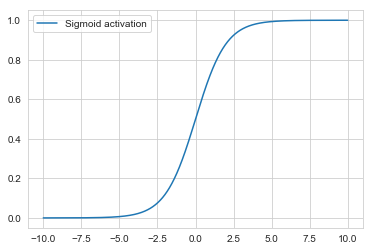

In [7]:
# define function
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
            
# create dataset 
z = np.arange(-10, 10, 0.01)
a = sigmoid(z)

# plot dataset
sns.lineplot(x=z, y=a, label = "Sigmoid activation")

### tanh activation function
The tanh function "squashes" numbers into the range (-1)-(+1) 
<br/>
- **Advantage**: 
    - Well defined gradients for any input value (function is smooth and continuous)
- **Disadvantage**
    - With small and large inputs, the curve of a tanh becomes almost flat, so its derivative is almost zero. Since parameters during learning a generally updated as <parameter_new = parameter * -partial derivative of parameter>, learning becomes very slow ("vanishing gradients") 

<img src='images\tanh.jpg' width='500' height='500'>

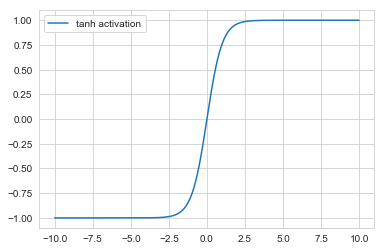

In [6]:
# define function
def tanh(Z):
    return (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
    
# create dataset 
z = np.arange(-10, 10, 0.01)
a = tanh(z)

# plot dataset
sns.lineplot(x=z, y=a, label='tanh activation')

### ReLU (rectified linear unit) activation function
The ReLU unit generally treats inputs depending on their range, i.e., has distinct function for input values larger/smaller 0. In case of the standard ReLU function, this entails a slope of 0 for input values <0 and a slope of 1 for input values >0. A "leaky" ReLU function usually has a very small positive slope for all negative inputs.   
<br/>
- **Advantage**: 
    - No vanishing gradients for positive values (i.e., there is always a distinct slope and thus learning can happen). Since z tends to become larger in deeper networks, this allows for training very deep neural networks (which makes it an attractive choice for image recognition tasks) 
    - Computationally cheap
- **Disadvantage**
    - ReLU: For negative values, it stops activating and thus learning can stop (i.e., if z of a neuron is always negative, its weight cannot be updated, because its derivative is always zero). 
    - Leaky ReLU: If the negative range slope is chosen to be between 0-1, activation values can quickly diminish for deeper networks (for units with negative z's)   


<img src='images\ReLU.jpg' width='500' height='500'>

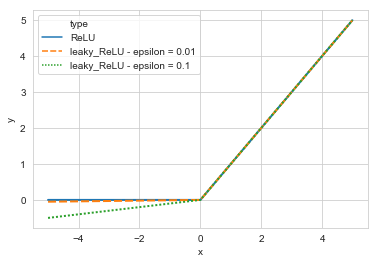

In [5]:
# ReLU 
def relu(Z):
    return np.maximum(0, Z)

# leaky ReLU 
def leaky_relu(Z, epsilon):
    return np.where(Z > 0, Z, epsilon*Z)

# create dataset 
z = np.arange(-5, 5, 0.01)
a_01 = relu(z)
a_02 = leaky_relu(z, 0.01)
a_03 = leaky_relu(z, 0.1)

# combine data in pandas dataframe
df_01 = pd.DataFrame({'x': z, 'y': a_01, 'type':100}).replace(100, 'ReLU')
df_02 = pd.DataFrame({'x': z, 'y': a_02, 'type':100}).replace(100, 'leaky_ReLU - epsilon = 0.01')
df_03 = pd.DataFrame({'x': z, 'y': a_03, 'type':100}).replace(100, 'leaky_ReLU - epsilon = 0.1')
df = pd.concat([df_01, df_02, df_03])

# plot dataframe
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)

### Softplus activation function
The Softplus function looks like a version of the ReLU function that is continously differentiable (i.e, does not have a "kink" at z=0). Interresingly, its derivative is the Sigmoid function 
<br/>
- **Advantage**: 
    - Has a continuous derivative and covers at least a small range of negative z's with a meaningful gradient 
- **Disadvantage**
    - Computationally more expensive that ReLU 

<img src='images\Softplus.jpg' width='500' height='500'>

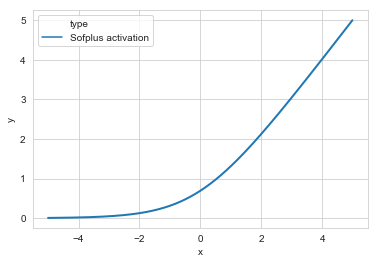

In [4]:
def softplus(z):
    return np.log(1+np.exp(z))

# create dataset 
z = np.arange(-5, 5, 0.01)
a = softplus(z)

# combine data in pandas dataframe
df = pd.DataFrame({'x': z, 'y': a, 'type':100}).replace(100, 'Sofplus activation')

# plot dataframe
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)

### ELU (exponential linear unit) activation function
The ELU function resembles the ReLU function for positive inputs, but is exponentially shaped for negative inputs (where the exact shape depends on a hyperparameter alpha). Often used in image recognition 
<br/>
- **Advantage**: 
    -TBD
- **Disadvantage**
    - Calculating the exponent costs computing power 

<img src='images\ELU.jpg' width='500' height='500'>

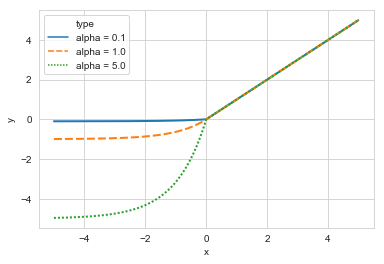

In [3]:
def ELU(Z, alpha):
    return np.where(Z > 0, Z, alpha*(np.exp(Z)-1))

# create dataset 
z = np.arange(-5, 5, 0.01)
a_01 = ELU(z, 0.1)
a_02 = ELU(z, 1)
a_03 = ELU(z, 5)

# combine data in pandas dataframe
df_01 = pd.DataFrame({'x': z, 'y': a_01, 'type':100}).replace(100, 'alpha = 0.1')
df_02 = pd.DataFrame({'x': z, 'y': a_02, 'type':100}).replace(100, 'alpha = 1.0')
df_03 = pd.DataFrame({'x': z, 'y': a_03, 'type':100}).replace(100, 'alpha = 5.0')
df = pd.concat([df_01, df_02, df_03])

# plot dataframe
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)

### Swish activation function
Multiplying Sigmoid(z) by z. Sometimes also introduces a parameter beta into the Sigmoid part of the function (see code below) 
<br/>
- **Advantage**: 
    - Avoids diminishing gradients for positive values of z (unlike Sigmoid) 
    - Has gradient for negative values of z (unlike ReLU) and seems to perform better than ReLU in deep neural networks
    - Well defined gradients for any input value (function is smooth and continuous)
- **Disadvantage**
    - Computationally more expensive than ReLU

<img src='images\Swish.jpg' width='500' height='500'>

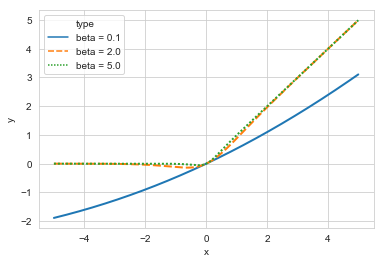

In [2]:
def swish(z):
    return z/(1+np.exp(-z))

def swish_beta(z, beta): 
    return z/(1+np.exp(beta*-z))

# create dataset 
z = np.arange(-5, 5, 0.01)
a_01 = swish_beta(z, 0.1)
a_02 = swish_beta(z, 2)
a_03 = swish_beta(z, 5)

# combine data in pandas dataframe
df_01 = pd.DataFrame({'x': z, 'y': a_01, 'type':100}).replace(100, 'beta = 0.1')
df_02 = pd.DataFrame({'x': z, 'y': a_02, 'type':100}).replace(100, 'beta = 2.0')
df_03 = pd.DataFrame({'x': z, 'y': a_03, 'type':100}).replace(100, 'beta = 5.0')
df = pd.concat([df_01, df_02, df_03])

# plot dataframe
sns.lineplot(x='x', y='y', hue='type', style='type', data=df, lw=2)